In [24]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold 
from scipy import stats
import seaborn as sns

import matplotlib.pyplot as plt

In [25]:
dataset = pd.read_csv("CreditPrediction.csv")
dataset

,CLIENTNUM,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Unnamed: 19
0,768805383,45.0,M,3,High School,Married,$60K - $80K,Blue,39.0,5.0,1,3,12691.0,777,1.335,1144,42,1.625,0.061,NaN
1,818770008,49.0,F,5,Graduate,NaN,Less than $40K,Blue,44.0,6.0,1,2,8256.0,864,1.541,1291,33,3.714,0.105,NaN
2,713982108,51.0,M,3,Graduate,Married,$80K - $120K,Blue,36.0,4.0,1,0,3418.0,0,2.594,1887,20,2.333,0.000,NaN
3,769911858,40.0,F,4,High School,NaN,Less than $40K,Blue,34.0,3.0,4,1,3313.0,2517,1.405,1171,20,2.333,0.760,NaN
4,709106358,40.0,M,3,Uneducated,Married,$60K - $80K,NaN,21.0,5.0,1,0,4716.0,0,2.175,816,28,2.500,0.000,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10162,718673358,35.0,M,3,Doctorate,NaN,$80K - $120K,Blue,30.0,5.0,3,4,13590.0,1528,0.728,2137,52,0.486,0.112,NaN
10163,715207458,46.0,F,1,Unknown,Single,Less than $40K,Blue,39.0,2.0,2,1,2029.0,1074,0.514,4802,90,0.800,0.529,NaN
10164,803665983,52.0,M,0,Unknown,NaN,$60K - $80K,Blue,46.0,3.0,2,4,2742.0,2184,0.592,3829,72,0.532,0.796,NaN
10165,713183508,39.0,F,1,High School,NaN,Unknown,NaN,36.0,1.0,3,2,2751.0,1158,0.821,4861,82,0.822,0.421,NaN


In [26]:
dataset.describe()

,CLIENTNUM,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Unnamed: 19
count,1.016700e+04,10167.000000,10167.000000,9944.000000,10147.000000,10167.000000,10167.000000,10167.000000,10167.000000,10167.000000,10167.000000,10167.000000,10167.000000,10167.000000,0.0
mean,7.391864e+08,46.753817,2.346513,35.913415,3.813245,2.341595,2.455887,8632.552346,1162.176748,0.759721,4402.349661,64.864463,0.712192,0.274716,NaN
std,3.690366e+07,13.520505,1.298701,7.980102,1.554741,1.010502,1.105580,9087.333842,815.082643,0.219054,3393.953441,23.461680,0.237934,0.275638,NaN
min,7.080821e+08,26.000000,0.000000,13.000000,1.000000,0.000000,0.000000,1438.300000,0.000000,0.000000,510.000000,10.000000,0.000000,0.000000,NaN
25%,7.130407e+08,41.000000,1.000000,31.000000,3.000000,2.000000,2.000000,2556.500000,348.500000,0.631000,2155.500000,45.000000,0.582000,0.022000,NaN
50%,7.179400e+08,46.000000,2.000000,36.000000,4.000000,2.000000,2.000000,4549.000000,1276.000000,0.736000,3900.000000,67.000000,0.702000,0.175000,NaN
75%,7.731435e+08,52.000000,3.000000,40.000000,5.000000,3.000000,3.000000,11067.500000,1783.000000,0.859000,4740.000000,81.000000,0.818000,0.502500,NaN
max,8.283431e+08,352.330517,5.000000,56.000000,6.000000,6.000000,6.000000,34516.000000,2517.000000,3.397000,18484.000000,139.000000,3.714000,0.999000,NaN


In [27]:
dataset = dataset.drop('Unnamed: 19', axis=1)

In [28]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10167 entries, 0 to 10166
Data columns (total 19 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CLIENTNUM                 10167 non-null  int64  
 1   Customer_Age              10167 non-null  float64
 2   Gender                    9968 non-null   object 
 3   Dependent_count           10167 non-null  int64  
 4   Education_Level           10167 non-null  object 
 5   Marital_Status            8217 non-null   object 
 6   Income_Category           10167 non-null  object 
 7   Card_Category             8243 non-null   object 
 8   Months_on_book            9944 non-null   float64
 9   Total_Relationship_Count  10147 non-null  float64
 10  Months_Inactive_12_mon    10167 non-null  int64  
 11  Contacts_Count_12_mon     10167 non-null  int64  
 12  Credit_Limit              10167 non-null  float64
 13  Total_Revolving_Bal       10167 non-null  int64  
 14  Total_

In [29]:
# dataset['Gender'].fillna(dataset['Gender'].mode())
# dataset.info()

In [30]:
dataset = dataset.drop_duplicates(subset=['CLIENTNUM'])
print("Shape After: ", dataset.shape)

Shape After:  (10127, 19)


In [31]:
dataset['Gender'] = LabelEncoder().fit_transform(dataset['Gender'])
dataset['Education_Level'] = LabelEncoder().fit_transform(dataset['Education_Level'])
dataset['Marital_Status'] = LabelEncoder().fit_transform(dataset['Marital_Status'])
dataset['Income_Category'] = LabelEncoder().fit_transform(dataset['Income_Category'])
dataset['Card_Category'] = LabelEncoder().fit_transform(dataset['Card_Category'])

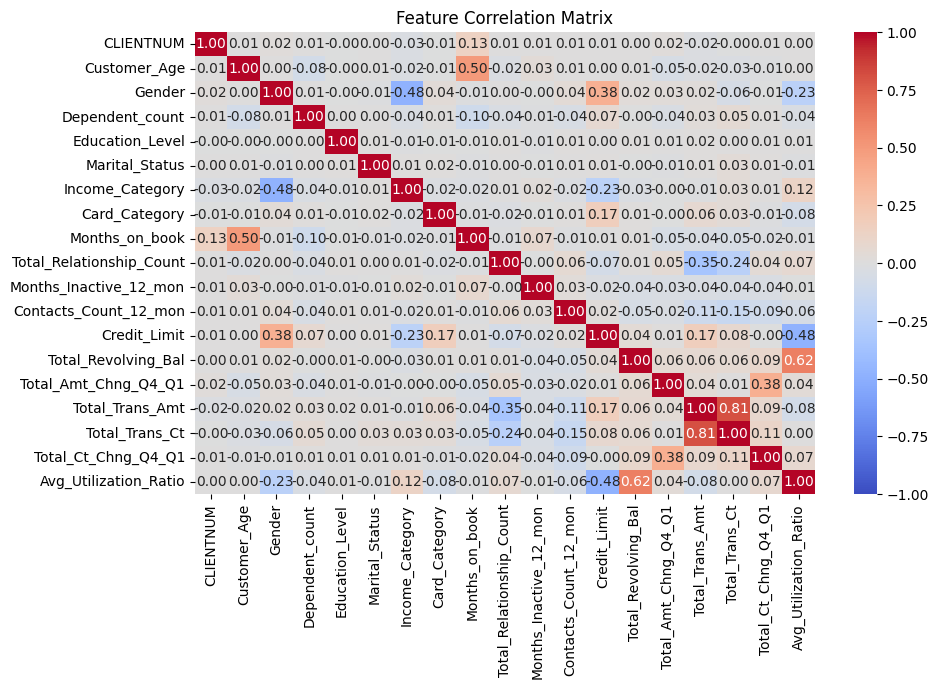

In [32]:
correlation_matrix = dataset.corr()

plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Feature Correlation Matrix')
plt.show()


In [33]:
# from sklearn.impute import KNNImputer

# imputer = KNNImputer(n_neighbors=2)
# imputer.fit_transform(dataset)
# dataset.info()

In [34]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10127 entries, 0 to 10126
Data columns (total 19 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CLIENTNUM                 10127 non-null  int64  
 1   Customer_Age              10127 non-null  float64
 2   Gender                    10127 non-null  int32  
 3   Dependent_count           10127 non-null  int64  
 4   Education_Level           10127 non-null  int32  
 5   Marital_Status            10127 non-null  int32  
 6   Income_Category           10127 non-null  int32  
 7   Card_Category             10127 non-null  int32  
 8   Months_on_book            9906 non-null   float64
 9   Total_Relationship_Count  10107 non-null  float64
 10  Months_Inactive_12_mon    10127 non-null  int64  
 11  Contacts_Count_12_mon     10127 non-null  int64  
 12  Credit_Limit              10127 non-null  float64
 13  Total_Revolving_Bal       10127 non-null  int64  
 14  Total_Amt_C

In [35]:
z_dataset = pd.DataFrame()

In [36]:
df = dataset.corr()
df['Credit_Limit']

CLIENTNUM                   0.005708
Customer_Age                0.004198
Gender                      0.378422
Dependent_count             0.068065
Education_Level             0.003076
Marital_Status              0.012410
Income_Category            -0.225394
Card_Category               0.169418
Months_on_book              0.007446
Total_Relationship_Count   -0.071277
Months_Inactive_12_mon     -0.020394
Contacts_Count_12_mon       0.020817
Credit_Limit                1.000000
Total_Revolving_Bal         0.042493
Total_Amt_Chng_Q4_Q1        0.012813
Total_Trans_Amt             0.171730
Total_Trans_Ct              0.075927
Total_Ct_Chng_Q4_Q1        -0.002020
Avg_Utilization_Ratio      -0.482965
Name: Credit_Limit, dtype: float64

In [37]:
z_dataset['z_age'] = np.abs(stats.zscore(dataset['Customer_Age']))
outlAge = list(np.where(np.abs(z_dataset['z_age']) > 3)[0])
print("Age Outliers: ", outlAge)
print("Total outlier Age: ", len(outlAge), "\n")
dataset.iloc[outlAge, :]

Age Outliers:  [2604, 2902, 3626, 4151, 4725, 4776, 4978, 7007, 7263, 7732, 7795, 8125, 8506, 9187, 9438, 9907, 10047]
Total outlier Age:  17 



,CLIENTNUM,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
2604,715731033,348.812169,1,3,2,2,0,4,42.0,3.0,1,3,33996.0,949,0.846,3569,77,0.571,0.028
2902,771960708,337.305494,1,2,2,1,3,0,40.0,3.0,2,4,3290.0,2461,0.797,3591,80,0.739,0.748
3626,814459833,342.081289,0,3,2,2,4,0,37.0,5.0,3,4,8017.0,0,0.539,3042,55,0.528,0.000
4151,712901283,230.297705,0,2,2,2,1,0,36.0,2.0,3,2,2121.0,0,0.618,1464,32,0.778,0.000
4725,779224758,232.613754,0,2,1,4,4,4,37.0,4.0,3,2,2168.0,1485,0.546,3828,86,0.720,0.685
4776,716961933,243.187983,0,2,2,1,4,0,36.0,5.0,2,4,3589.0,1808,0.750,4262,70,0.667,0.504
4978,716013858,270.081685,1,0,2,2,3,0,34.0,3.0,1,4,20231.0,1434,0.543,5002,78,0.660,0.071
7007,713873658,344.458168,1,4,3,2,0,4,37.0,4.0,3,3,2701.0,1986,0.538,4767,76,0.854,0.735
7263,708894183,286.093650,1,3,0,2,0,3,NaN,4.0,4,2,34516.0,1073,0.558,4485,86,0.755,0.031
7732,788132208,286.884960,0,2,2,1,1,0,NaN,3.0,2,1,1989.0,1003,0.677,5070,70,0.750,0.504


In [38]:
dataset = dataset.drop(dataset.index[outlAge])
dataset.shape

(10110, 19)

In [39]:
# dataset = dataset.dropna()
dataset['Months_on_book'].fillna(value=dataset['Months_on_book'].mean(), inplace=True)
dataset['Total_Relationship_Count'].fillna(value=dataset['Total_Relationship_Count'].mean(), inplace=True)

In [40]:
dataset

,CLIENTNUM,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,768805383,45.0,1,3,3,1,2,0,39.0,5.0,1,3,12691.0,777,1.335,1144,42,1.625,0.061
1,818770008,49.0,0,5,2,4,4,0,44.0,6.0,1,2,8256.0,864,1.541,1291,33,3.714,0.105
2,713982108,51.0,1,3,2,1,3,0,36.0,4.0,1,0,3418.0,0,2.594,1887,20,2.333,0.000
3,769911858,40.0,0,4,3,4,4,0,34.0,3.0,4,1,3313.0,2517,1.405,1171,20,2.333,0.760
4,709106358,40.0,1,3,5,1,2,4,21.0,5.0,1,0,4716.0,0,2.175,816,28,2.500,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10122,772366833,50.0,1,2,2,2,1,0,40.0,3.0,2,3,4003.0,1851,0.703,15476,117,0.857,0.462
10123,710638233,41.0,1,2,6,0,1,0,25.0,4.0,2,3,4277.0,2186,0.804,8764,69,0.683,0.511
10124,716506083,44.0,0,1,3,4,4,0,36.0,5.0,3,4,5409.0,0,0.819,10291,60,0.818,0.000
10125,717406983,30.0,1,2,2,3,1,0,36.0,4.0,3,3,5281.0,0,0.535,8395,62,0.722,0.000


In [41]:
dataset = pd.DataFrame(dataset, columns=['CLIENTNUM', 'Customer_Age', 'Gender', 'Dependent_count',
       'Education_Level', 'Marital_Status', 'Income_Category', 'Card_Category',
       'Months_on_book', 'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Total_Revolving_Bal',
       'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt', 'Total_Trans_Ct',
       'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio', 'Credit_Limit'])

In [42]:
data = dataset.iloc[:, 1:-1]
label = dataset.iloc[:,-1]

In [43]:
x_train, x_test, y_train, y_test = train_test_split(data, label, test_size=0.30, shuffle=1, random_state=7)

C:\Users\Asus\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\_param_validation.py:594: FutureWarning: Passing an int for a boolean parameter is deprecated in version 1.2 and won't be supported anymore in version 1.4.
  warnings.warn(


In [44]:
#scaler = MinMaxScaler(feature_range=(0, 1))
from sklearn.linear_model import SGDRegressor
from sklearn.pipeline import make_pipeline


scaler = StandardScaler()
scaler = scaler.fit(x_train, y_train)
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)


In [45]:
clf = SGDRegressor(max_iter=10000, tol=1e-3, learning_rate=0.1, validation_fraction=0.1, random_state=6)

In [48]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_percentage_error

model = LinearRegression().fit(x_train, y_train)
score = model.score(x_test,y_test)
y_pred = model.predict(x_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("-----LinearRegressor Evaluation------\n")
print(f'Mean squared Error (MSE): {mse:.2f}')
print(f'R2 Score: {r2:.4f}\n')
print("---------------------------------------")

-----LinearRegressor Evaluation------

Mean squared Error (MSE): 42535249.37
R2 Score: 0.4832

---------------------------------------


In [51]:
from sklearn import ensemble
clf = ensemble.GradientBoostingRegressor(n_estimators = 400, max_depth = 5, min_samples_split = 2,
          learning_rate = 0.1, loss = 'squared_error')

In [52]:
clf.fit(x_train, y_train)

GradientBoostingRegressor(max_depth=5, n_estimators=400)

In [53]:
clf.score(x_test,y_test)

0.8832770626880028

In [54]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("-----LinearRegressor Evaluation------\n")
print(f'Mean squared Error (MSE): {mse:.2f}')
print(f'R2 Score: {r2:.4f}\n')
print("---------------------------------------")

-----LinearRegressor Evaluation------

Mean squared Error (MSE): 42535249.37
R2 Score: 0.4832

---------------------------------------


In [533]:
from sklearn.model_selection import KFold, cross_val_score


k_folds = KFold(n_splits = 5)

scores = cross_val_score(clf, data, label, cv = k_folds)


In [316]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_percentage_error
mean_absolute_percentage_error(y_test, clf.predict(x_test))

0.2968296220172114

In [534]:
print("Mean Squared Error for test(clf): ", mean_squared_error(y_test, clf.predict(x_test)))
print("R_score for test: ", r2_score(y_test, clf.predict(x_test)))

Mean Squared Error for test(clf):  9561598.41375766
R_score for test:  0.8838178924113665


In [319]:
print("Mean Squared Error for train(clf): ", mean_squared_error(y_train, clf.predict(x_train)))
print("R_score for train: ", r2_score(y_train, clf.predict(x_train)))

Mean Squared Error for train(clf):  1638693.4601372678
R_score for train:  0.9801799181784188


In [320]:
print("Mean Squared Error for test: ", mean_squared_error(y_test, model.predict(x_test)))
print("R_score for test: ", r2_score(y_test, model.predict(x_test)))

Mean Squared Error for test:  42535249.37386184
R_score for test:  0.48315807616926953


In [321]:
print("Mean Squared Error for train: ", mean_squared_error(y_train, model.predict(x_train)))
print("R_score for train: ", r2_score(y_train, model.predict(x_train)))

Mean Squared Error for train:  43516943.41239804
R_score for train:  0.4736603275474105


In [56]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

poly = PolynomialFeatures(degree=3)
x_train_poly = poly.fit_transform(x_train)
x_test_poly = poly.transform(x_test)

model = LinearRegression()
model.fit(x_train_poly, y_train)
y_pred = model.predict(x_test_poly)

In [57]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("-----LinearRegressor Evaluation------\n")
print(f'Mean squared Error (MSE): {mse:.2f}')
print(f'R2 Score: {r2:.4f}\n')
print("---------------------------------------")

-----LinearRegressor Evaluation------

Mean squared Error (MSE): 19312367.30
R2 Score: 0.7653

---------------------------------------


In [504]:
x_train.shape

(7077, 17)

In [505]:
from sklearn.decomposition import PCA
pca = PCA(n_components=5)
pca.fit(x_train)

PCA(n_components=5)

In [60]:
from sklearn.linear_model import Ridge
import numpy as np

clf = Ridge(alpha=0.1)
clf.fit(x_train, y_train)


Ridge(alpha=0.1)

In [62]:
mse = mean_squared_error(y_test, clf.predict(x_test))
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, clf.predict(x_test))
r2 = r2_score(y_test, y_pred)

print("-----LinearRegressor Evaluation------\n")
print(f'Mean squared Error (MSE): {mse:.2f}')
print(f'R2 Score: {r2:.4f}\n')
print("---------------------------------------")

-----LinearRegressor Evaluation------

Mean squared Error (MSE): 42535260.67
R2 Score: 0.7653

---------------------------------------


In [63]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_percentage_error

model = RandomForestRegressor(max_depth=10).fit(x_train, y_train)

mse = mean_squared_error(y_test, model.predict(x_test))
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, model.predict(x_test))
r2 = r2_score(y_test, y_pred)

print("-----LinearRegressor Evaluation------\n")
print(f'Mean squared Error (MSE): {mse:.2f}')
print(f'R2 Score: {r2:.4f}\n')
print("---------------------------------------")

-----LinearRegressor Evaluation------

Mean squared Error (MSE): 10679719.90
R2 Score: 0.7653

---------------------------------------
